
                        Project – data analysis and preparation

1) Stating the use case:

After the model is being built, it could be used to detect which species are most likely to become extinct based on the records from previous years and the climatic factors, land use along with various other features affecting this extinction in the Alpine regions of Canada. It could be used in the future maybe by conservational departments across Canada to preserve nature’s diversity by predicting the endangered species of birds and thus, preserving those extictions by taking preventive measures.

In this use case, False Positives are more important as a bird predicted to be present when it's actually not present will lead the scientists to think that the bird belonging to that particular species does not come under endangered species, when it actually is on the verge of extincition and thus, no preventive measures will be taken to preserve it, which will eventually lead to loss of diversity. Hence, any of the false positive values must be avoided.

In this particular scenario, RMSE could be the perfect metric in comparing two different models.

2) Cleaning the data:

In [64]:
import pandas as pd
birds = pd.read_csv('Alpine_Birds.csv', encoding = 'Windows-1252')
birds.head()


,Ecoregion,Park,Point transect name,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Sky condition,Wind speed (km/h),Common_Name,Scientific_Name,Number of Birds Detected from 0-3:20 (minutes),Number of Birds Detected from 3:20-6:40 (minutes),Number of Birds Detected from 6:40-10:00 (minutes),Behaviour,Easting coordinate,Northing coordinate
0,Alpine,GNP,Abbott Ridge,3,2334.0,2014,7,9,14.8,clear,1.6,PINE SISKIN,Carduelis pinus,1,1,2,Calling,464268,5677100
1,Alpine,GNP,Abbott Ridge,3,2334.0,2016,6,28,10.6,Broken,0.0,TOWNSEND'S SOLITAIRE,Myadestes townsendi,1,1,1,Singing,464268,5677100
2,Alpine,GNP,Abbott Ridge,3,2334.0,2018,7,8,11.3,broken,0.0,AMERICAN PIPIT,Anthus spinoletta,0,1,0,Singing,464268,5677100
3,Alpine,GNP,Abbott Ridge,3,2334.0,2018,7,8,11.3,broken,0.0,SWAINSON'S THRUSH,Catharus ustulatus,0,0,1,Calling,464268,5677100
4,Alpine,GNP,Abbott Ridge,3,2334.0,2019,7,12,9.5,Broken,9.0,PINE SISKIN,Carduelis pinus,3,0,1,Calling,464268,5677100


In [65]:
birds.isna().sum()

Ecoregion                                               0
Park                                                    0
Point transect name                                     0
Point transect identification                           0
Elevation (m)                                          68
Year                                                    0
Month                                                   0
Day                                                     0
Temperature (Celcius)                                 103
Sky condition                                           0
Wind speed (km/h)                                      57
Common_Name                                             0
Scientific_Name                                        58
Number of Birds Detected from 0-3:20 (minutes)          0
Number of Birds Detected from 3:20-6:40 (minutes)       0
Number of Birds Detected from 6:40-10:00 (minutes)      0
Behaviour                                               1
Easting coordi

In [66]:
# filling missing values for elevation
birds = pd.DataFrame(birds)
birds['Elevation (m)'] = pd.to_numeric(birds['Elevation (m)'])
temp_birds = birds.dropna(subset = ['Elevation (m)'])
# temp_birds.head()
ele_mean = temp_birds['Elevation (m)'].mean()
birds = birds.fillna({'Elevation (m)': ele_mean})
birds.head()


,Ecoregion,Park,Point transect name,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Sky condition,Wind speed (km/h),Common_Name,Scientific_Name,Number of Birds Detected from 0-3:20 (minutes),Number of Birds Detected from 3:20-6:40 (minutes),Number of Birds Detected from 6:40-10:00 (minutes),Behaviour,Easting coordinate,Northing coordinate
0,Alpine,GNP,Abbott Ridge,3,2334.0,2014,7,9,14.8,clear,1.6,PINE SISKIN,Carduelis pinus,1,1,2,Calling,464268,5677100
1,Alpine,GNP,Abbott Ridge,3,2334.0,2016,6,28,10.6,Broken,0.0,TOWNSEND'S SOLITAIRE,Myadestes townsendi,1,1,1,Singing,464268,5677100
2,Alpine,GNP,Abbott Ridge,3,2334.0,2018,7,8,11.3,broken,0.0,AMERICAN PIPIT,Anthus spinoletta,0,1,0,Singing,464268,5677100
3,Alpine,GNP,Abbott Ridge,3,2334.0,2018,7,8,11.3,broken,0.0,SWAINSON'S THRUSH,Catharus ustulatus,0,0,1,Calling,464268,5677100
4,Alpine,GNP,Abbott Ridge,3,2334.0,2019,7,12,9.5,Broken,9.0,PINE SISKIN,Carduelis pinus,3,0,1,Calling,464268,5677100


In [67]:
# Filling missing values for Temperature
temp_temp = birds.dropna(subset = ['Temperature (Celcius)'])
temp_mean = temp_temp['Temperature (Celcius)'].mean()
birds = birds.fillna({'Temperature (Celcius)': temp_mean})

# Dealing with missing values for wind speed 
temp_wind = birds.dropna(subset = 'Wind speed (km/h)')
wind_mean = temp_wind['Wind speed (km/h)'].mean()
birds = birds.fillna({'Wind speed (km/h)': wind_mean})


In [68]:
# dealing with missing values in Scientific_Name and Behaviour column 
from sklearn.preprocessing import LabelEncoder

# initialize label_encoder
sc_name = LabelEncoder()
behaviour = LabelEncoder()

birds['Scientific_Name'] = sc_name.fit_transform(birds['Scientific_Name'])
birds['Behaviour'] = behaviour.fit_transform(birds['Behaviour'])

sc_mean = birds['Scientific_Name'].mean()
birds = birds.fillna({'Scientific_Name': sc_mean})

be_mean = birds['Behaviour'].mean()
birds = birds.fillna({'Behaviour':be_mean})
birds.isna().sum()

Ecoregion                                             0
Park                                                  0
Point transect name                                   0
Point transect identification                         0
Elevation (m)                                         0
Year                                                  0
Month                                                 0
Day                                                   0
Temperature (Celcius)                                 0
Sky condition                                         0
Wind speed (km/h)                                     0
Common_Name                                           0
Scientific_Name                                       0
Number of Birds Detected from 0-3:20 (minutes)        0
Number of Birds Detected from 3:20-6:40 (minutes)     0
Number of Birds Detected from 6:40-10:00 (minutes)    0
Behaviour                                             0
Easting coordinate                              

3) Describing the data:

In [69]:
birds.describe()

,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Wind speed (km/h),Scientific_Name,Number of Birds Detected from 0-3:20 (minutes),Number of Birds Detected from 3:20-6:40 (minutes),Number of Birds Detected from 6:40-10:00 (minutes),Behaviour,Easting coordinate,Northing coordinate
count,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,783.000000,7.830000e+02
mean,7.132822,2226.577622,2018.275862,6.782886,14.374202,12.662500,2.952204,16.596424,0.873563,0.822478,0.809706,2.362708,471579.914432,5.681686e+06
std,4.420972,115.086871,2.582256,0.412544,7.669263,3.617416,2.485099,13.692759,0.758989,0.753784,0.745529,1.965492,9594.465503,6.856159e+03
min,1.000000,2059.000000,2013.000000,6.000000,4.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,450143.000000,5.665262e+06
25%,3.000000,2113.000000,2016.000000,7.000000,9.000000,10.300000,1.100000,3.000000,0.000000,0.000000,0.000000,0.000000,463089.000000,5.677100e+06
50%,7.000000,2223.000000,2019.000000,7.000000,13.000000,12.662500,2.400000,14.000000,1.000000,1.000000,1.000000,4.000000,477185.000000,5.681551e+06
75%,10.500000,2269.000000,2021.000000,7.000000,21.000000,15.000000,4.500000,23.000000,1.000000,1.000000,1.000000,4.000000,478009.000000,5.681723e+06
max,19.000000,2533.000000,2021.000000,7.000000,30.000000,25.000000,15.000000,41.000000,5.000000,5.000000,5.000000,5.000000,482197.000000,5.694690e+06


In [70]:
# Label encoding all the string values 
ec_region = LabelEncoder()
park = LabelEncoder()
point_name = LabelEncoder()
co_name = LabelEncoder()

birds['Ecoregion'] = ec_region.fit_transform(birds['Ecoregion'])
birds['Park'] = park.fit_transform(birds['Park'])
birds['Point transect name'] = point_name.fit_transform(birds['Point transect name'])
birds['Common_Name'] = co_name.fit_transform(birds['Common_Name'])


In [71]:
birds.head(2)

,Ecoregion,Park,Point transect name,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Sky condition,Wind speed (km/h),Common_Name,Scientific_Name,Number of Birds Detected from 0-3:20 (minutes),Number of Birds Detected from 3:20-6:40 (minutes),Number of Birds Detected from 6:40-10:00 (minutes),Behaviour,Easting coordinate,Northing coordinate
0,0,0,0,3,2334.0,2014,7,9,14.8,clear,1.6,25,1,1,1,2,0,464268,5677100
1,0,0,0,3,2334.0,2016,6,28,10.6,Broken,0.0,34,17,1,1,1,4,464268,5677100


In [72]:
birds['Sky condition'].value_counts()

Sky condition
Clear        284
clear        170
Scattered    136
Broken        57
Overcast      43
scattered     42
broken        33
Obscured      18
Name: count, dtype: int64

In [73]:
birds.loc[ birds['Sky condition'] == 'Clear', 'Sky condition'] = 'clear'
birds.loc[ birds['Sky condition'] == 'Scattered', 'Sky condition'] = 'scattered'
birds.loc[ birds['Sky condition'] == 'Broken', 'Sky condition'] = 'broken'


In [74]:
birds['Sky condition'].value_counts()

Sky condition
clear        454
scattered    178
broken        90
Overcast      43
Obscured      18
Name: count, dtype: int64

In [75]:
sk_co = LabelEncoder()

birds['Sky condition'] = sk_co.fit_transform(birds['Sky condition'])

In [76]:
birds.head()

,Ecoregion,Park,Point transect name,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Sky condition,Wind speed (km/h),Common_Name,Scientific_Name,Number of Birds Detected from 0-3:20 (minutes),Number of Birds Detected from 3:20-6:40 (minutes),Number of Birds Detected from 6:40-10:00 (minutes),Behaviour,Easting coordinate,Northing coordinate
0,0,0,0,3,2334.0,2014,7,9,14.8,3,1.6,25,1,1,1,2,0,464268,5677100
1,0,0,0,3,2334.0,2016,6,28,10.6,2,0.0,34,17,1,1,1,4,464268,5677100
2,0,0,0,3,2334.0,2018,7,8,11.3,2,0.0,0,0,0,1,0,4,464268,5677100
3,0,0,0,3,2334.0,2018,7,8,11.3,2,0.0,33,4,0,0,1,0,464268,5677100
4,0,0,0,3,2334.0,2019,7,12,9.5,2,9.0,25,1,3,0,1,0,464268,5677100


In [77]:
correlation = birds.corr(method = 'pearson')
print(correlation)

                                                    Ecoregion  Park  \
Ecoregion                                                 NaN   NaN   
Park                                                      NaN   NaN   
Point transect name                                       NaN   NaN   
Point transect identification                             NaN   NaN   
Elevation (m)                                             NaN   NaN   
Year                                                      NaN   NaN   
Month                                                     NaN   NaN   
Day                                                       NaN   NaN   
Temperature (Celcius)                                     NaN   NaN   
Sky condition                                             NaN   NaN   
Wind speed (km/h)                                         NaN   NaN   
Common_Name                                               NaN   NaN   
Scientific_Name                                           NaN   NaN   
Number

4) Creating visualizations:

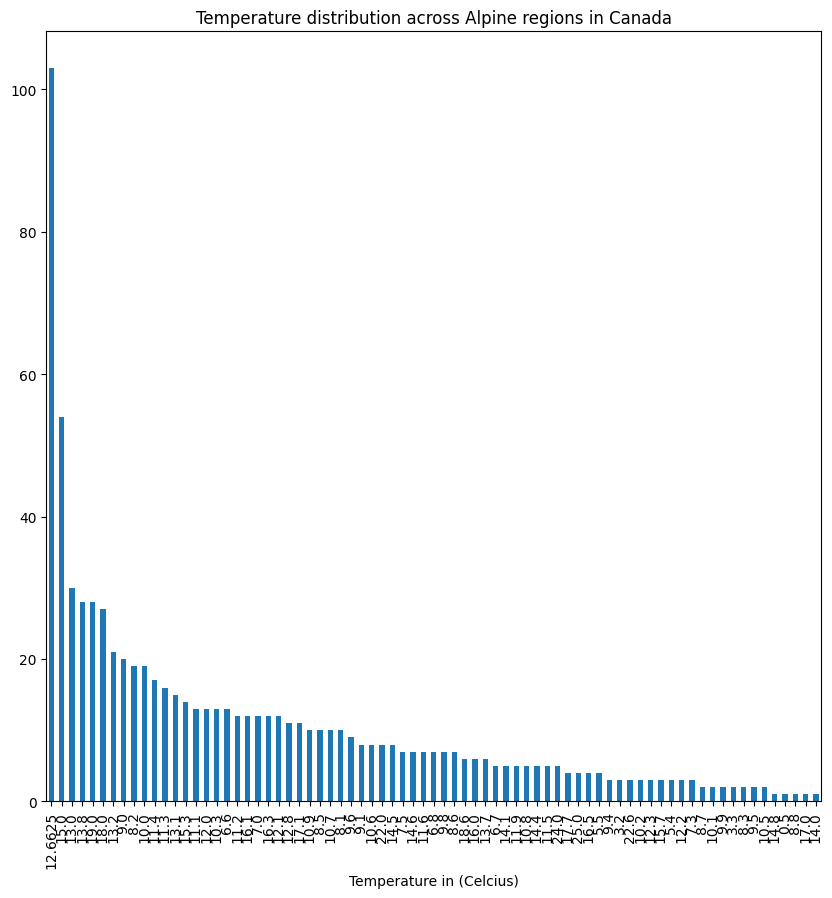

In [78]:
import matplotlib.pyplot as plt
temp_counts = birds['Temperature (Celcius)'].value_counts()
plt.figure(figsize = (10, 10))
temp_counts.plot(kind = 'bar')
plt.xlabel('Temperature in (Celcius)')
plt.title('Temperature distribution across Alpine regions in Canada')
plt.show()

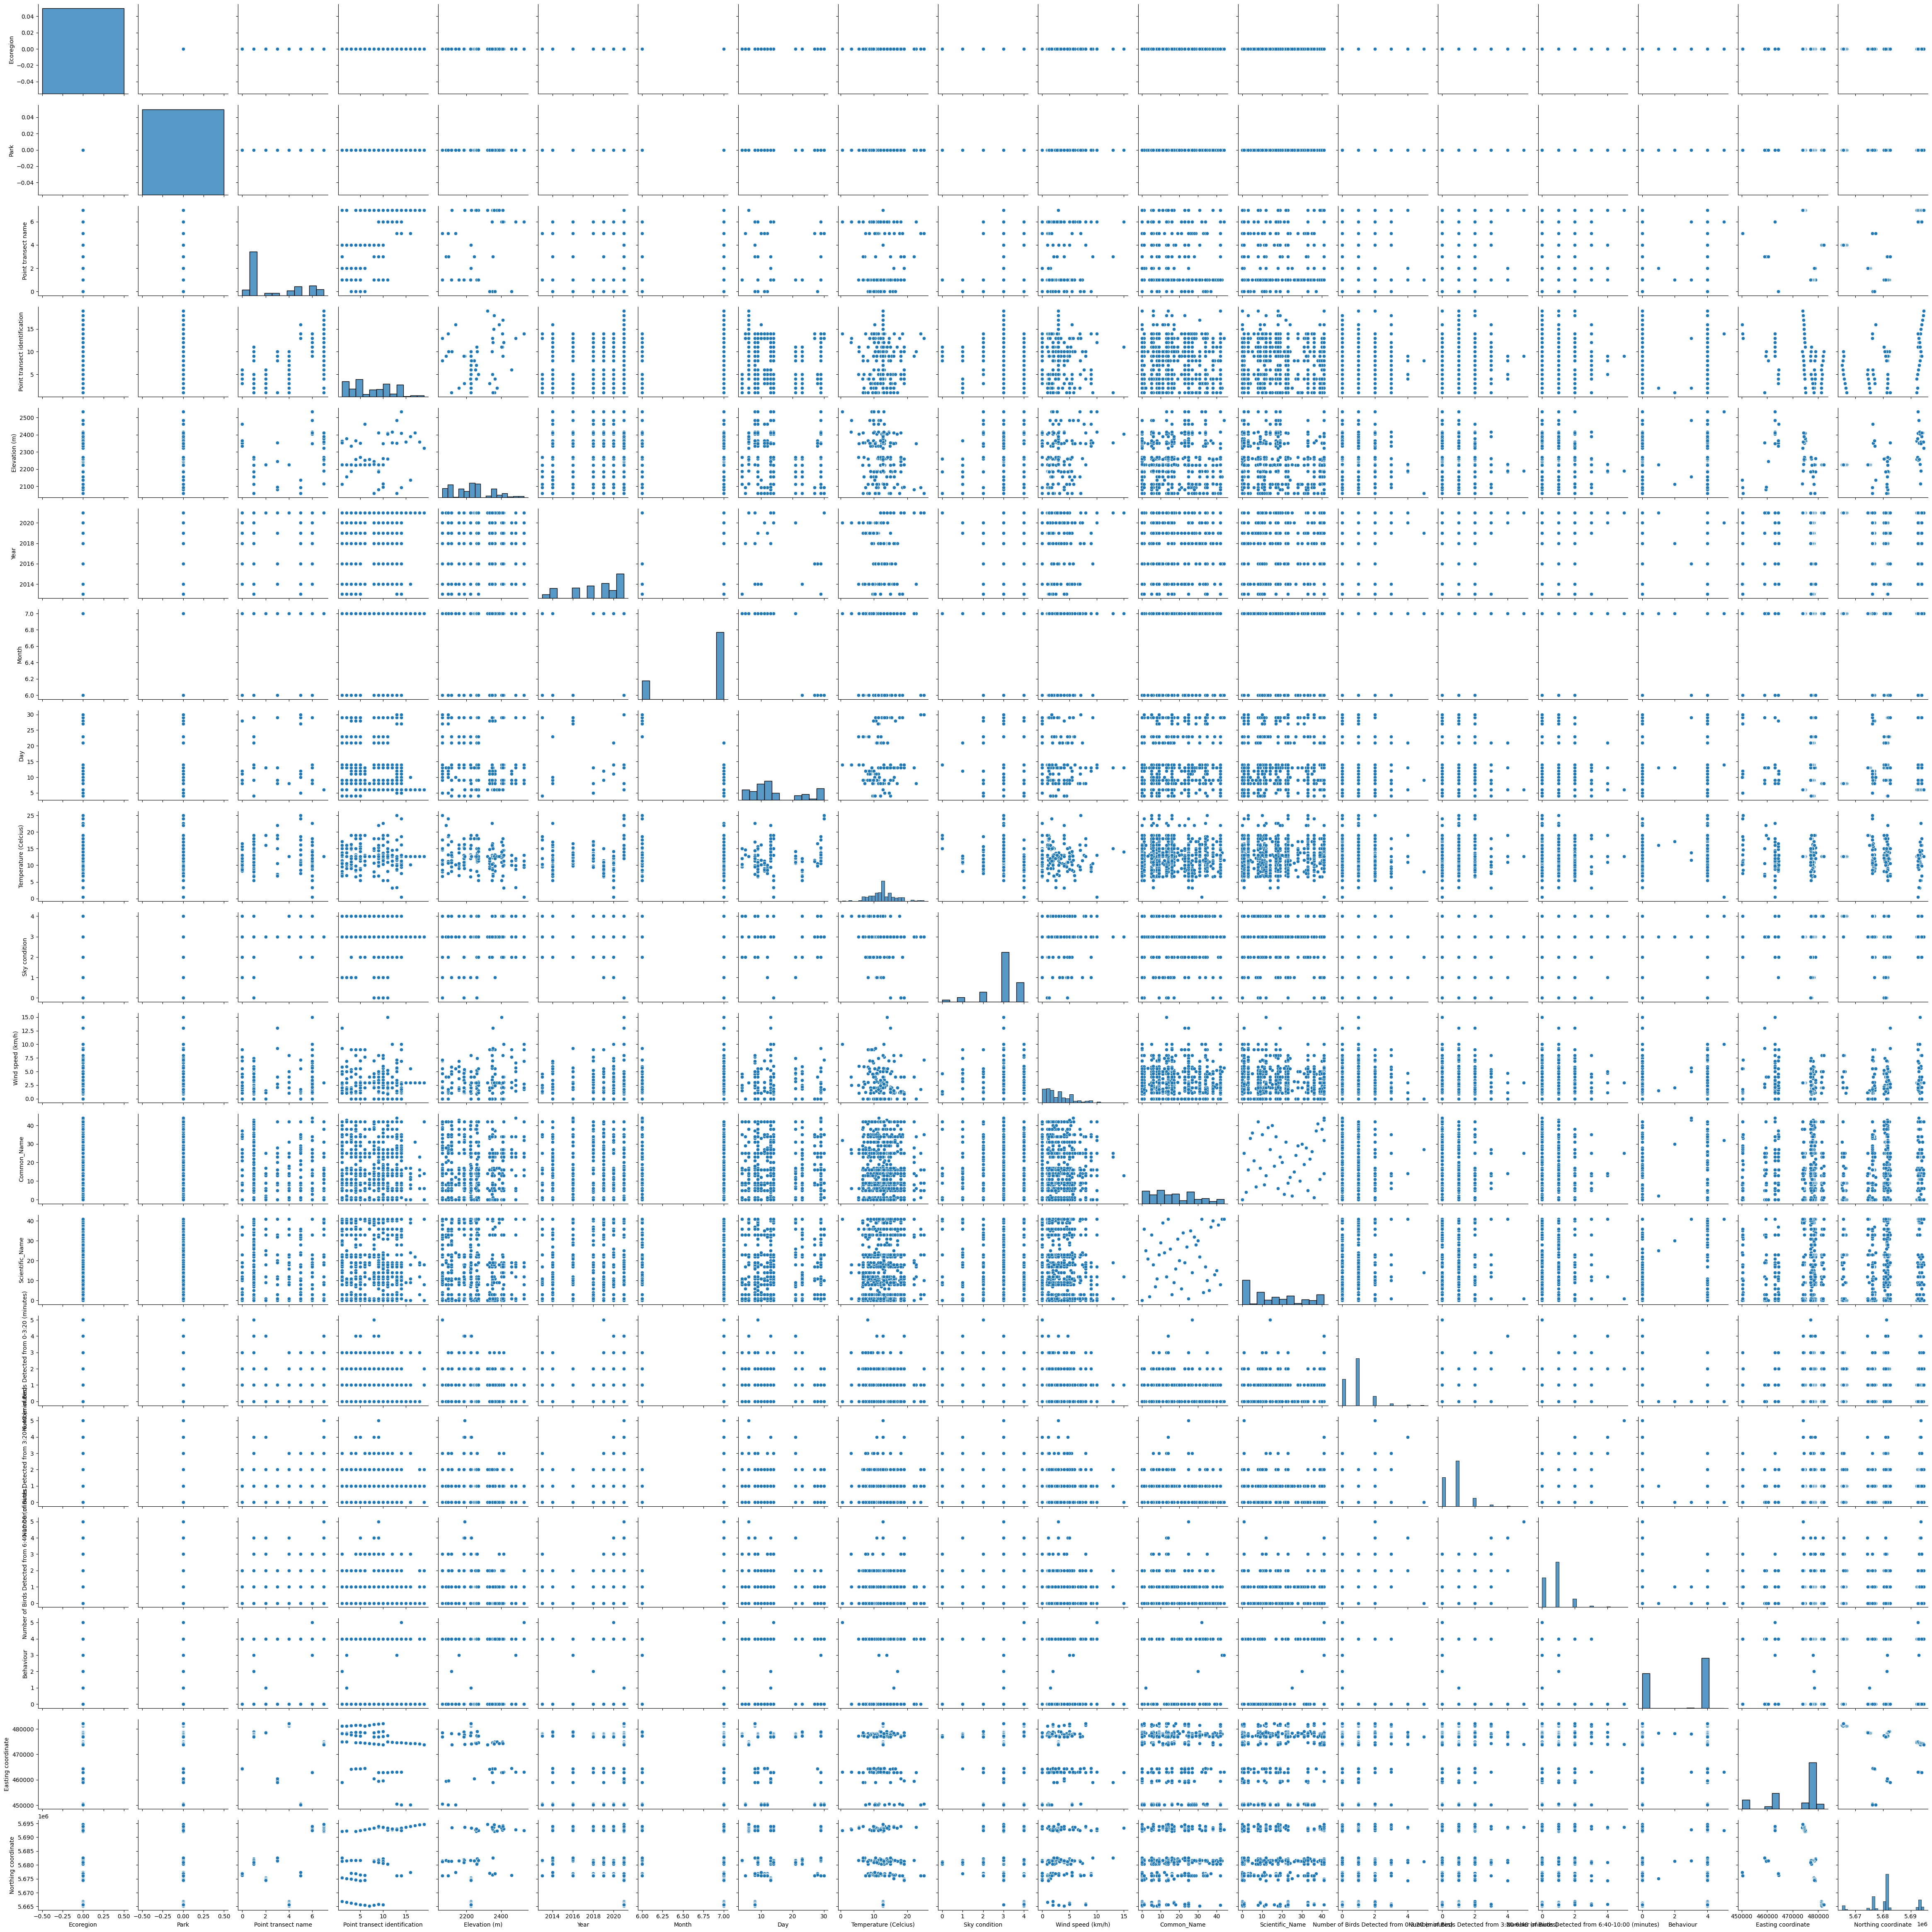

In [79]:
import seaborn as sns
sns.pairplot(birds)
plt.show()

5) Preparing data to be used as an input:

In [80]:
from sklearn.model_selection import train_test_split


#Let's combine the three columns to have a label in the dataframe
birds['label'] = birds['Number of Birds Detected from 0-3:20 (minutes)'] + \
                 birds['Number of Birds Detected from 3:20-6:40 (minutes)'] + \
                 birds['Number of Birds Detected from 6:40-10:00 (minutes)']
birds = birds.drop(['Number of Birds Detected from 0-3:20 (minutes)', 
                   'Number of Birds Detected from 3:20-6:40 (minutes)', 
                   'Number of Birds Detected from 6:40-10:00 (minutes)'], axis =1)

x = birds.drop(columns=['label'])
y = birds['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7)
# x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, train_size = 0.5)

# Since this is a regression problem, we cannot use 'stratify' to the 'label' column

6) Using 'pandas' to save the dataset in three different 'csv' files:
   

In [81]:
birds_training_data = pd.concat([x_train, y_train], axis =1)
birds_training_data.to_csv('birds_training_data.csv', index = False)
# birds_validating_data = pd.concat([x_val, y_val], axis = 1)
# birds_validating_data.to_csv('birds_validating_data.csv', index = False)
birds_testing_data = pd.concat([x_test, y_test], axis = 1)
birds_testing_data.to_csv('birds_testing_data.csv', index = False)

In [82]:
birds_training_data.head()

,Ecoregion,Park,Point transect name,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Sky condition,Wind speed (km/h),Common_Name,Scientific_Name,Behaviour,Easting coordinate,Northing coordinate,label
60,0,0,1,1,2113.0,2014,6,23,8.2000,4,5.800000,25,1,0,478277,5681410,1
639,0,0,7,2,2377.0,2021,7,6,12.6625,3,2.952204,17,9,4,474891,5692366,1
480,0,0,5,16,2137.0,2014,7,10,10.2000,3,5.500000,8,11,4,450143,5677392,1
189,0,0,1,2,2155.0,2018,7,13,16.1000,3,6.900000,9,23,4,478009,5681551,3
129,0,0,1,10,2261.0,2019,7,9,11.1000,4,4.600000,13,12,0,477137,5680688,2


In [83]:
birds_training_data.size


9316

In [84]:
# birds_validating_data.head()

In [85]:
# birds_validating_data.size

In [86]:
birds_testing_data.head()

,Ecoregion,Park,Point transect name,Point transect identification,Elevation (m),Year,Month,Day,Temperature (Celcius),Sky condition,Wind speed (km/h),Common_Name,Scientific_Name,Behaviour,Easting coordinate,Northing coordinate,label
442,0,0,5,14,2094.000000,2013,6,29,18.6000,2,1.3,9,23,4,450251,5676081,1
349,0,0,1,8,2060.000000,2018,7,13,14.5000,3,7.0,8,11,4,476955,5681271,3
293,0,0,1,4,2223.000000,2019,7,9,6.6000,4,0.0,8,11,4,477481,5681611,3
153,0,0,1,11,2260.000000,2019,7,9,15.0000,4,2.2,14,41,0,477339,5680336,6
601,0,0,4,3,2226.577622,2021,7,8,12.6625,4,5.0,17,9,0,481249,5666234,2


In [87]:
birds_testing_data.size

3995